In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/airlink23072017/DfAirLink23072017.csv
/kaggle/input/groundtruth23072017/ascii20170723.csv
/kaggle/input/matcheddata-10km4min/MatchedData_10km4min_2018.csv
/kaggle/input/matcheddata-10km4min/StormsXY.csv
/kaggle/input/matcheddata-10km4min/MatchedData_10km4min_2020.csv
/kaggle/input/matcheddata-10km4min/AirLinkXY.csv
/kaggle/input/matcheddata-10km4min/MatchedData_10km4min_2017.csv
/kaggle/input/matcheddata-10km4min/MatchedData_10km4min_2016.csv
/kaggle/input/matcheddata-10km4min/MatchedData_10km4min_2015.csv
/kaggle/input/matcheddata-10km4min/MatchedData_10km4min_2019.csv


# Gettiong to know the data

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

**Storm 23-07-2017**

In [ ]:
DfStorm2017 = pd.read_csv('../input/matcheddata-10km4min/MatchedData_10km4min_2017.csv')
DfStorm2017.Seed = 0
#DfStorm2017.AirLinkInd = []

In [ ]:
DfStorm2017 =  DfStorm2017[(pd.to_datetime(DfStorm2017['TimeStamp'])>pd.to_datetime('2017-07-23 21:29:59'))&
         (pd.to_datetime(DfStorm2017['TimeStamp'])<pd.to_datetime('2017-07-23 23:31:59'))&
              (DfStorm2017['NSimpleTracks']==7)&(DfStorm2017['ComplexNum']==15)]
DfStorm2017['index'] = range(1, len(DfStorm2017) + 1)
DfStorm2017.set_index('index')


DfStorm2017.describe()

,Unnamed: 0,NSimpleTracks,ComplexNum,SimpleNum,ReflCentroidLat(deg),ReflCentroidLon(deg),Year,VilFromMaxZ(kg/m2),Seed,X,Y,index
count,74.000000,74.0,74.0,74.000000,74.000000,74.000000,74.0,74.000000,74.0,74.000000,74.000000,74.000000
mean,147131.756757,7.0,15.0,21.783784,52.005673,-114.445297,2017.0,30.917251,0.0,33.132372,-23.221989,37.500000
std,16398.179794,0.0,0.0,6.251072,0.038951,0.316657,0.0,12.536189,0.0,4.264605,21.761024,21.505813
min,130826.000000,7.0,15.0,15.000000,51.930600,-114.967000,2017.0,1.538370,0.0,24.912998,-59.126823,1.000000
25%,130844.250000,7.0,15.0,18.000000,51.988400,-114.727000,2017.0,24.257500,0.0,31.129920,-42.566104,19.250000
50%,147134.500000,7.0,15.0,18.000000,51.999700,-114.457000,2017.0,34.200700,0.0,32.530569,-23.997513,37.500000
75%,163417.750000,7.0,15.0,28.000000,52.023700,-114.169000,2017.0,40.256600,0.0,35.121471,-4.238137,55.750000
max,163443.000000,7.0,15.0,31.000000,52.113100,-113.912000,2017.0,50.870000,0.0,44.987407,13.410792,74.000000


In [ ]:
DfStorm2017.drop(['AirLinkInd'], axis=1)
#DfStorm2017.AirLinkInd = [ ]

In [ ]:
df17 = pd.read_csv("../input/groundtruth23072017/ascii20170723.csv")
df17['TimeStamp'] = df17[['Year','Month','Day','Hour','Min','Sec']].apply(lambda x: pd.datetime(*x), axis=1)
df17.insert(11, "seed", 0, True) 
df17.seed = df17.Seed.map(dict(Yes=1, No=0))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


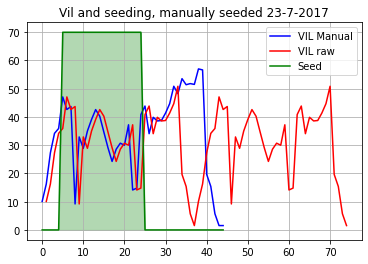

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(0, len(df17) ),df17['Vil from maxZ (kg/m2)'],'b')
plt.plot(DfStorm2017['index'],DfStorm2017 ['VilFromMaxZ(kg/m2)'],'r')
plt.plot(70*df17['seed'],'g')
plt.fill_between( range(df17.shape[0]),70*df17['seed'], alpha=0.30, color='green', interpolate=True)
plt.title('Vil and seeding, manually seeded 23-7-2017')
#plt.legend(['VIL','Max dbZ','Seed'])
plt.legend(['VIL Manual','VIL raw','Seed'])
plt.grid(True)
plt.show()

In [ ]:
DfAirLink = pd.read_csv('../input/matcheddata-10km4min/AirLinkXY.csv',index_col=[0])  

/opt/conda/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [ ]:
DfAirLink.head()

,Day,HH:MM:SS,LAT,LON,TimeStamp,X,Y
0,2018-07-13,00:00:01,50.7279,-113.4160,2018-07-13 00:00:01,-108.897013,48.810901
1,2018-07-13,00:00:02,50.7286,-113.4167,2018-07-13 00:00:02,-108.819611,48.760746
2,2018-07-13,00:00:04,50.7294,-113.4175,2018-07-13 00:00:04,-108.731152,48.703427
3,2018-07-13,00:00:05,50.7302,-113.4183,2018-07-13 00:00:05,-108.642691,48.646110
4,2018-07-13,00:00:06,50.7317,-113.4198,2018-07-13 00:00:06,-108.476826,48.538647


In [ ]:
StartDate = '2017-07-23 20:29:59'
EndDate = '2017-07-24  03:31:59'

In [ ]:
dfAir =  DfAirLink[(pd.to_datetime(DfAirLink['TimeStamp'])>pd.to_datetime(StartDate))&
         (pd.to_datetime(DfAirLink['TimeStamp'])<pd.to_datetime(EndDate))]

In [ ]:
import matplotlib.pyplot as plt


**Remove outlaires**

In [ ]:
q_Y  = DfAirLink["Y"].quantile(0.95)
q_X  = DfAirLink["X"].quantile(0.95)

DfAirLink = DfAirLink[(DfAirLink["X"] < q_X) & (DfAirLink["Y"] < q_Y)]


In [ ]:
DfAirLink.describe()

,LAT,LON,X,Y
count,2.328529e+06,2.328529e+06,2.328529e+06,2.328529e+06
mean,5.145796e+01,-1.142457e+02,-2.785449e+01,-9.636632e+00
std,4.957098e-01,2.978025e-01,5.516313e+01,2.062998e+01
min,5.020660e+01,-1.157522e+02,-1.671149e+02,-1.138311e+02
25%,5.105180e+01,-1.144507e+02,-7.305504e+01,-2.388665e+01
50%,5.134500e+01,-1.142382e+02,-4.043791e+01,-9.121331e+00
75%,5.188510e+01,-1.140227e+02,1.967795e+01,5.872046e+00
max,5.241610e+01,-1.136115e+02,7.870078e+01,3.376125e+01


In [ ]:
#DfAirLink['index'] = range(1, len(DfAirLink) + 1)
DfAirLink.head()
#DfAirLink.sort(pd.to_datetime('TimeStamp'))

,Day,HH:MM:SS,LAT,LON,TimeStamp,X,Y
300,2018-07-13,00:05:07,50.9963,-113.6268,2018-07-13 00:05:07,-79.158108,33.731608
301,2018-07-13,00:05:08,50.9972,-113.6273,2018-07-13 00:05:08,-79.058217,33.695852
302,2018-07-13,00:05:09,50.9991,-113.6285,2018-07-13 00:05:09,-78.847400,33.610232
303,2018-07-13,00:05:10,51.0000,-113.6291,2018-07-13 00:05:10,-78.747554,33.567461
304,2018-07-13,00:05:11,51.0009,-113.6296,2018-07-13 00:05:11,-78.647661,33.531711


In [ ]:
import seaborn as sns

In [ ]:
def distanceTemp(row, AirLink_df):
    diss0 = pd.to_datetime(DfAirLink['TimeStamp']).sub(pd.to_datetime(row['TimeStamp']))
    #diss = pd.Series(pd.Timedelta(diss0).seconds / 60.0)
    diss1 = diss0.dt.total_seconds()/ 60.0#np.abs(diss)
    return diss1.min()

In [ ]:
def distanceXY(row, AirLink_df):
    diss = pd.Series(np.sqrt(AirLink_df['X'].sub(row['X'])**2+AirLink_df['Y'].sub(row['Y'])**2))
    return diss.min()

In [ ]:

dfs =  DfStorm2017[(pd.to_datetime(DfStorm2017['TimeStamp'])>pd.to_datetime(StartDate))&
                  (pd.to_datetime(DfStorm2017['TimeStamp'])<pd.to_datetime(EndDate))]

#dfs['index'] = range(1, len(dfs) + 1)
#dfs.set_index('index')
dfs = dfs.drop(['AirLinkInd'], axis=1)
dfs['SpatDiss'] =0                       
dfs['SpatDiss'] = dfs.apply(lambda x: distanceXY(x,DfAirLink), axis=1)
dfs['TempDiss'] = 0
#dfs['TempDiss'] = dfs.apply(lambda x: distanceTemp(x,DfAirLink), axis=1)
dfs.head(3)

,Unnamed: 0,NSimpleTracks,ComplexNum,SimpleNum,DayDate,HH:MM:SS,ReflCentroidLat(deg),ReflCentroidLon(deg),Year,VilFromMaxZ(kg/m2),TimeStamp,Seed,X,Y,index,SpatDiss,TempDiss
15662,130826,7,15,15,2017-07-23,21:36:55.000000,51.9362,-114.967,2017,10.0859,2017-07-23 21:36:55,0,25.650412,-59.126823,1,0.075096,0
15663,130827,7,15,15,2017-07-23,21:40:47.000000,51.9497,-114.925,2017,16.2659,2017-07-23 21:40:47,0,27.119210,-56.221569,2,0.095352,0
15664,130828,7,15,15,2017-07-23,21:44:39.000000,51.9601,-114.895,2017,27.3213,2017-07-23 21:44:39,0,28.253621,-54.146525,3,0.352157,0


In [ ]:
dfs.describe()

,Unnamed: 0,NSimpleTracks,ComplexNum,SimpleNum,ReflCentroidLat(deg),ReflCentroidLon(deg),Year,VilFromMaxZ(kg/m2),Seed,X,Y,index,SpatDiss,TempDiss
count,74.000000,74.0,74.0,74.000000,74.000000,74.000000,74.0,74.000000,74.0,74.000000,74.000000,74.000000,74.000000,74.0
mean,147131.756757,7.0,15.0,21.783784,52.005673,-114.445297,2017.0,30.917251,0.0,33.132372,-23.221989,37.500000,0.121180,0.0
std,16398.179794,0.0,0.0,6.251072,0.038951,0.316657,0.0,12.536189,0.0,4.264605,21.761024,21.505813,0.098722,0.0
min,130826.000000,7.0,15.0,15.000000,51.930600,-114.967000,2017.0,1.538370,0.0,24.912998,-59.126823,1.000000,0.013068,0.0
25%,130844.250000,7.0,15.0,18.000000,51.988400,-114.727000,2017.0,24.257500,0.0,31.129920,-42.566104,19.250000,0.045034,0.0
50%,147134.500000,7.0,15.0,18.000000,51.999700,-114.457000,2017.0,34.200700,0.0,32.530569,-23.997513,37.500000,0.089992,0.0
75%,163417.750000,7.0,15.0,28.000000,52.023700,-114.169000,2017.0,40.256600,0.0,35.121471,-4.238137,55.750000,0.145927,0.0
max,163443.000000,7.0,15.0,31.000000,52.113100,-113.912000,2017.0,50.870000,0.0,44.987407,13.410792,74.000000,0.360492,0.0


In [ ]:
!pip install -U seaborn

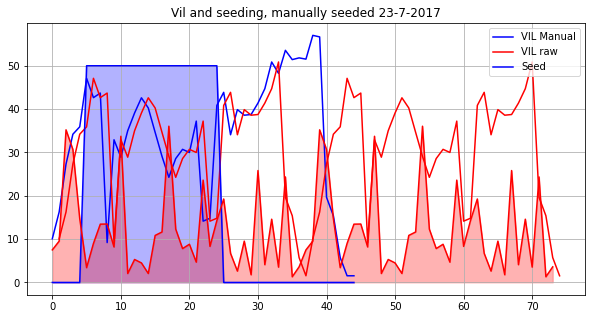

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(range(0, len(df17) ),df17['Vil from maxZ (kg/m2)'],'b')
plt.plot(DfStorm2017['index'],DfStorm2017 ['VilFromMaxZ(kg/m2)'],'r')

S = 50
plt.plot(S*df17['seed'],'b')
plt.fill_between( range(df17.shape[0]),S*df17['seed'], alpha=0.30, color='blue', interpolate=True)


plt.plot(range(dfs.shape[0]),2*S*dfs['SpatDiss'],'r')
plt.fill_between(range(dfs.shape[0]),2*S*dfs['SpatDiss'], alpha=0.30, color='red', interpolate=True)

plt.title('Vil and seeding, manually seeded 23-7-2017')
#plt.legend(['VIL','Max dbZ','Seed'])
plt.legend(['VIL Manual','VIL raw','Seed'])
plt.grid(True)
plt.show()

In [ ]:
plt.show

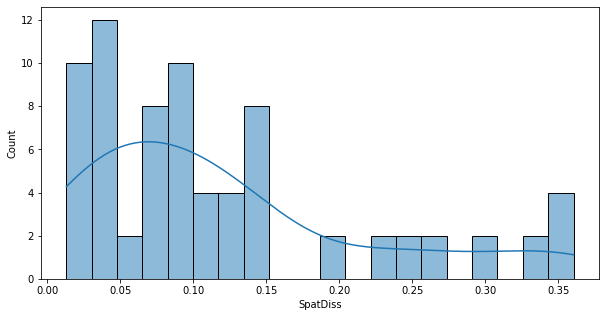

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.histplot(data=dfs, x="SpatDiss",bins=20, kde=True)

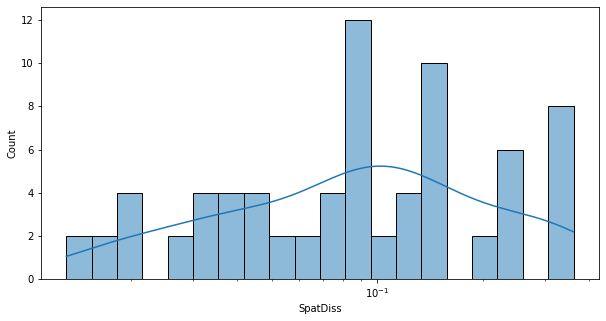

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(data=dfs, x="SpatDiss",bins=20, log_scale=True, kde=True)

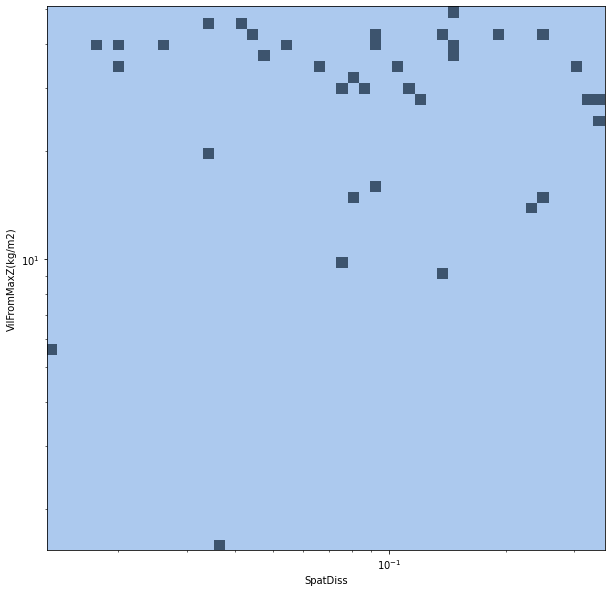

In [ ]:
plt.figure(figsize=(10,10))
sns.histplot(
    dfs, x="SpatDiss", y="VilFromMaxZ(kg/m2)",
    bins=50, discrete=(False, False), log_scale=(True,True),
    thresh=None,
    cbar=False,# cbar_kws=dict(shrink=.75),
)

In [ ]:
dfs.head(2)

,Unnamed: 0,NSimpleTracks,ComplexNum,SimpleNum,DayDate,HH:MM:SS,ReflCentroidLat(deg),ReflCentroidLon(deg),Year,VilFromMaxZ(kg/m2),TimeStamp,Seed,X,Y,index,SpatDiss,TempDiss
15662,130826,7,15,15,2017-07-23,21:36:55.000000,51.9362,-114.967,2017,10.0859,2017-07-23 21:36:55,0,25.650412,-59.126823,1,0.075096,0
15663,130827,7,15,15,2017-07-23,21:40:47.000000,51.9497,-114.925,2017,16.2659,2017-07-23 21:40:47,0,27.119210,-56.221569,2,0.095352,0


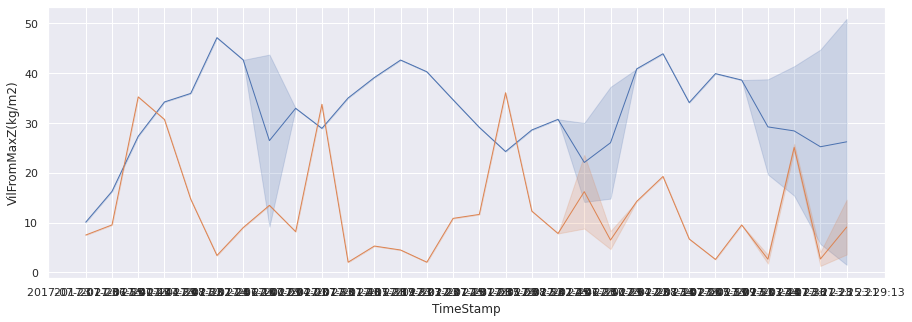

In [ ]:
sns.set_theme(style="darkgrid")
f, ax = plt.subplots(figsize=(15, 5))
sns.lineplot(x="TimeStamp", y="VilFromMaxZ(kg/m2)",data=dfs,linewidth=1.0, ax=ax)
sns.lineplot(x="TimeStamp", y=2*S*dfs["SpatDiss"],data=dfs,linewidth=1.0, ax=ax)

In [ ]:
dfs["LogSpatDiss"] = np.log(dfs["SpatDiss"])
dfs["LogVilFromMaxZ(kg/m2)"] = np.log(dfs["VilFromMaxZ(kg/m2)"])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


Pandas computed Pearson r: 0.5501923997109363 
Scipy computed Pearson r: -0.069230548330356 and p-value: 0.557802504315984 


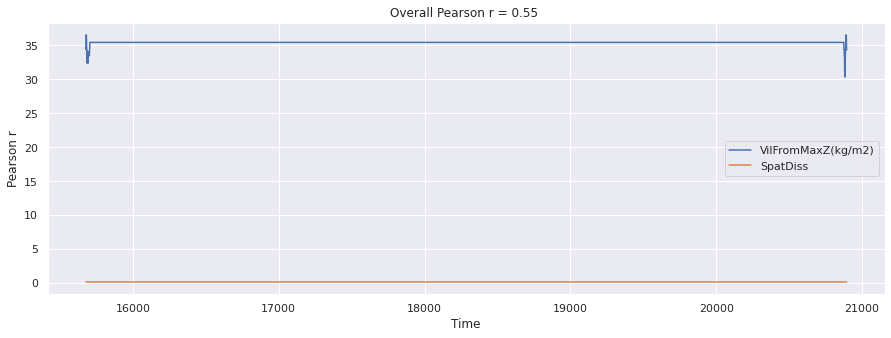

In [ ]:
import  pandas  as  pd 
import  numpy  as  np 

import  matplotlib.pyplot  as  plt 
import  seaborn  as  sns 
import  scipy.stats  as  stats

dfsmal = dfs[["TimeStamp","VilFromMaxZ(kg/m2)","SpatDiss"]]
dfsmal['TimeStamp'] = pd.to_datetime(dfsmal['TimeStamp'])

overall_pearson_r  =  dfs.corr ().iloc [9 , 10 ]
print ( f"Pandas computed Pearson r: { overall_pearson_r } " )

r , p  =  stats.pearsonr( dfs.dropna()[ 'SpatDiss' ], dfs.dropna()[ 'VilFromMaxZ(kg/m2)' ])
print ( f"Scipy computed Pearson r: { r } and p-value: { p } " )

# Calculate the synchronization of the sliding window 
f , ax = plt.subplots ( figsize = ( 15 , 5 ))
dfsmal.rolling ( window = 30 , center = True ).median().plot ( ax = ax )
ax.set ( xlabel = 'Time' , ylabel = 'Pearson r' )
ax.set ( title =f"Overall Pearson r = { np.round( overall_pearson_r , 2 ) } " );

Text(0.5, 0.98, 'rolling window correlation')

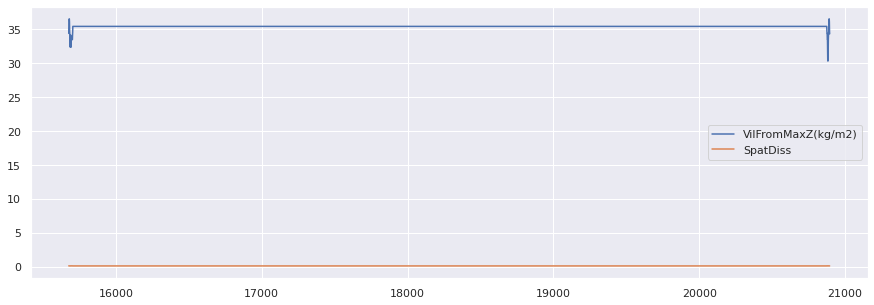

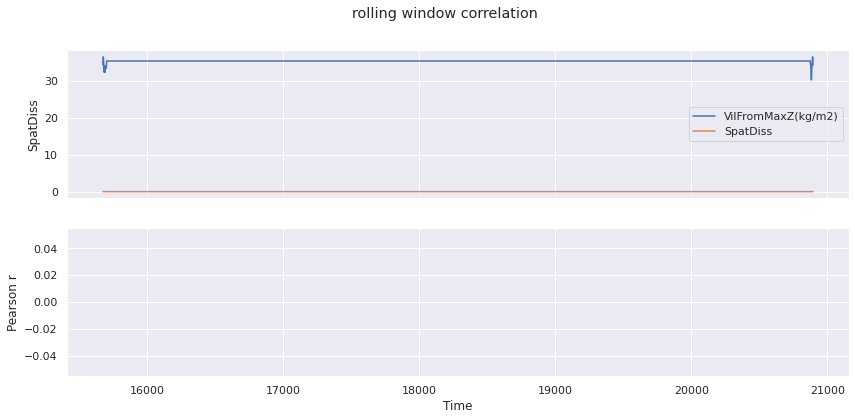

In [ ]:
r_window_size = 120

df_interpolated = dfsmal.interpolate()
f , ax = plt.subplots ( figsize = ( 15 , 5 ))
dfsmal.rolling ( window = 30 , center = True ).median().plot ( ax = ax )
dfsmal = dfs[["TimeStamp","VilFromMaxZ(kg/m2)","SpatDiss"]]

rolling_r = df_interpolated['SpatDiss'].rolling(window=r_window_size, center=True).corr(df_interpolated['VilFromMaxZ(kg/m2)'])
f,ax=plt.subplots(2,1,figsize=(14,6),sharex=True)
dfsmal.rolling(window=30,center=True).median().plot(ax=ax[0])
ax[0].set(xlabel='Time',ylabel='SpatDiss')
rolling_r.plot(ax=ax[1])
ax[1].set(xlabel='Time',ylabel='Pearson r')
plt.suptitle("rolling window correlation")

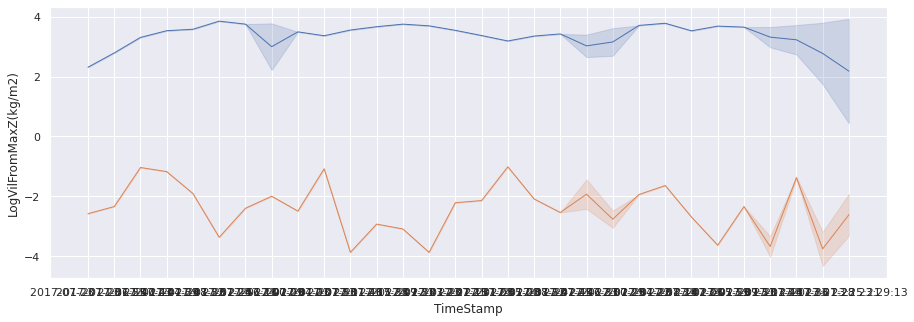

In [ ]:

f, ax = plt.subplots(figsize=(15, 5))
sns.lineplot(x="TimeStamp", y="LogVilFromMaxZ(kg/m2)",data=dfs,linewidth=1.0, ax=ax)
sns.lineplot(x="TimeStamp", y=dfs["LogSpatDiss"],data=dfs,linewidth=1.0, ax=ax)

In [ ]:
def pop_std(x):
    return x.std(ddof=0)

result = dfs.groupby(['SimpleNum'], as_index=False).agg(
    {'SimpleNum':'first',
    'VilFromMaxZ(kg/m2)':['max','mean','std'],
    'X':['mean','std','min','max'],
    'Y':['mean','std','min','max'],
    'NSimpleTracks':['count','min','max'],
    'SpatDiss':['min','max','mean','std']
                              })
result.reset_index()
result.columns = ['_'.join(col).strip() for col in result.columns.values]


In [ ]:
result.head()

,SimpleNum_first,VilFromMaxZ(kg/m2)_max,VilFromMaxZ(kg/m2)_mean,VilFromMaxZ(kg/m2)_std,X_mean,X_std,X_min,X_max,Y_mean,Y_std,Y_min,Y_max,NSimpleTracks_count,NSimpleTracks_min,NSimpleTracks_max,SpatDiss_min,SpatDiss_max,SpatDiss_mean,SpatDiss_std
0,15,47.09890,32.153325,12.898338,29.424721,2.186903,25.650412,31.998707,-51.292280,4.816190,-59.126823,-44.626717,16,7,7,0.034080,0.352157,0.154400,0.110277
1,16,9.19246,9.192460,0.000000,24.912998,0.000000,24.912998,24.912998,-48.473220,0.000000,-48.473220,-48.473220,2,7,7,0.134829,0.134829,0.134829,0.000000
2,18,42.60710,33.330208,5.272625,34.099782,2.335365,31.036337,37.342352,-30.330357,8.330464,-42.566104,-16.589675,26,7,7,0.020603,0.360492,0.113841,0.107392
3,26,14.81050,14.476000,0.386247,29.600365,1.750965,28.083984,31.116745,-9.498704,1.471254,-10.772847,-8.224561,4,7,7,0.083183,0.236079,0.159631,0.088275
4,28,43.86710,39.451720,3.374266,33.375472,0.599884,32.656932,34.173094,-4.594788,5.186790,-11.995518,1.804499,10,7,7,0.026151,0.192571,0.104757,0.061158


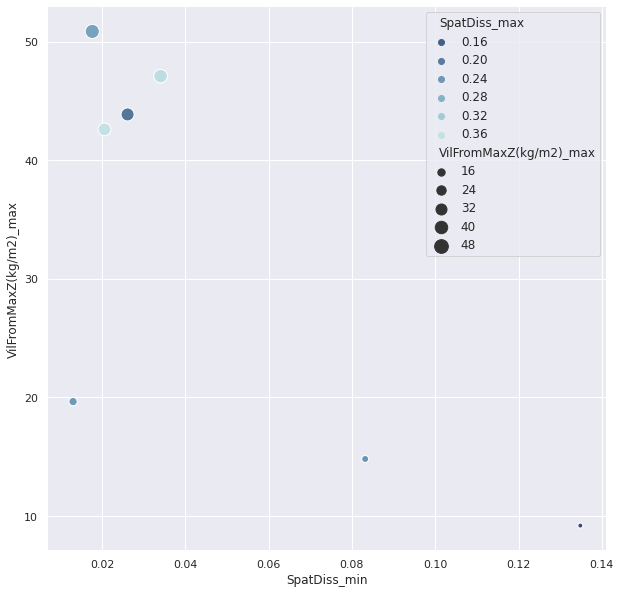

In [ ]:
f, ax = plt.subplots(figsize=(10, 10))
sns.despine(f, left=True, bottom=True)
#clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]
sns.scatterplot(x="SpatDiss_min", y="VilFromMaxZ(kg/m2)_max",
                hue="SpatDiss_max", size="VilFromMaxZ(kg/m2)_max",
                palette="ch:r=-.2,d=.3_r",
                sizes=(25, 200), linewidth=1.0,
                data=result, ax=ax)

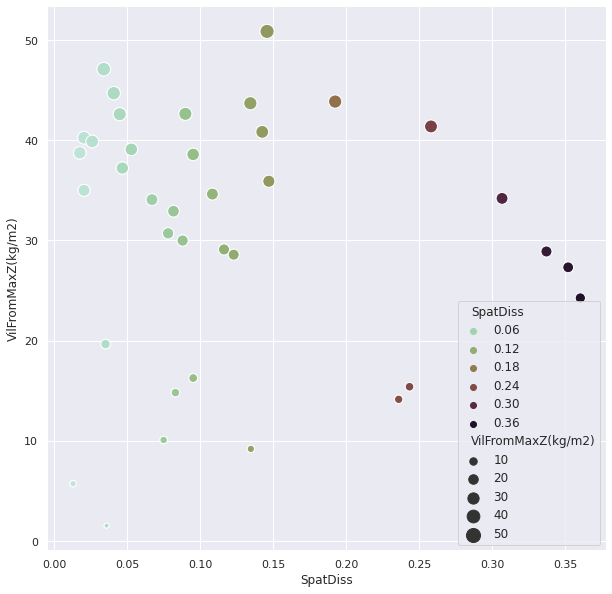

In [ ]:
f, ax = plt.subplots(figsize=(10, 10))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(x="SpatDiss", y="VilFromMaxZ(kg/m2)",
                hue="SpatDiss", size="VilFromMaxZ(kg/m2)",
                palette="ch:r=.9,d=.1",
                sizes=(25, 200), linewidth=1.0, 
                data=dfs, ax=ax)

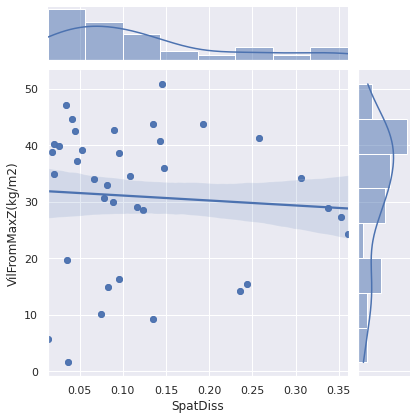

In [ ]:
sns.jointplot(x="SpatDiss", y="VilFromMaxZ(kg/m2)", data=dfs, kind="reg");

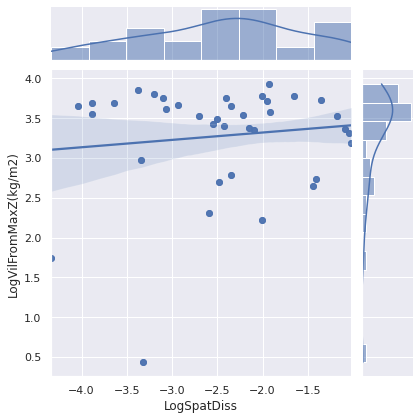

In [ ]:

sns.jointplot(x="LogSpatDiss", y="LogVilFromMaxZ(kg/m2)", data=dfs, kind="reg");

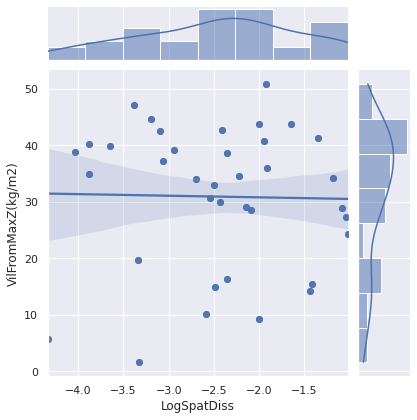

In [ ]:
sns.jointplot(x="LogSpatDiss", y="VilFromMaxZ(kg/m2)", data=dfs, kind="reg");

In [ ]:
Stats = dfs.groupby(['SimpleNum'], as_index=False).agg(
    {'SimpleNum':'first',
    'VilFromMaxZ(kg/m2)':['max','mean','std'],
    'X':['mean','std','min','max'],
    'Y':['mean','std','min','max'],
    'NSimpleTracks':['count','min','max'],
    'TimeStamp':['min','max'],
    'SpatDiss':['min','max','mean','std']
    })
Stats.reset_index()
Stats.columns = ['_'.join(col).strip() for col in Stats.columns.values]

Stats['TimeDuration'] = pd.to_datetime(Stats['TimeStamp_max'])-pd.to_datetime(Stats['TimeStamp_min'])
Stats['DurationSecond'] =Stats['TimeDuration'].dt.total_seconds()

Stats.describe()

,SimpleNum_first,VilFromMaxZ(kg/m2)_max,VilFromMaxZ(kg/m2)_mean,VilFromMaxZ(kg/m2)_std,X_mean,X_std,X_min,X_max,Y_mean,Y_std,Y_min,Y_max,NSimpleTracks_count,NSimpleTracks_min,NSimpleTracks_max,SpatDiss_min,SpatDiss_max,SpatDiss_mean,SpatDiss_std,TimeDuration,DurationSecond
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.0,7.0,7.000000,7.000000,7.000000,7.000000,7,7.000000
mean,23.428571,32.585166,26.158241,4.933821,32.209467,1.351009,30.469848,33.872247,-19.317627,3.790452,-24.531690,-13.993301,10.571429,7.0,7.0,0.047085,0.253979,0.123589,0.081329,0 days 00:16:36,996.000000
std,6.876461,17.335792,14.415762,4.453628,5.312075,0.969287,4.965988,6.174333,24.107566,2.702420,25.012460,24.217756,8.141604,0.0,0.0,0.045337,0.081034,0.027743,0.039518,0 days 00:15:45.964410887,945.964411
min,15.000000,9.192460,9.192460,0.000000,24.912998,0.000000,24.912998,24.912998,-51.292280,0.000000,-59.126823,-48.473220,2.000000,7.0,7.0,0.013068,0.134829,0.081980,0.000000,0 days 00:00:00,0.000000
25%,17.000000,17.230300,12.526689,1.880257,29.512543,0.525649,26.867198,31.557726,-39.401788,2.308602,-45.519662,-30.608196,6.000000,7.0,7.0,0.019141,0.214325,0.109299,0.074717,0 days 00:07:45,465.000000
50%,26.000000,42.607100,32.153325,4.843535,32.018056,1.750965,31.036337,32.574428,-9.498704,3.582513,-11.995518,-8.224561,8.000000,7.0,7.0,0.026151,0.243515,0.115684,0.100188,0 days 00:11:37,697.000000
75%,29.000000,45.483000,36.390964,6.517179,33.737627,2.159717,32.035191,35.757723,-2.485673,5.001490,-7.537239,3.275138,13.000000,7.0,7.0,0.058632,0.305183,0.144614,0.104702,0 days 00:21:18,1278.000000
max,31.000000,50.870000,43.926600,12.898338,42.034876,2.335365,39.534820,44.987407,9.342519,8.330464,5.514311,13.410792,26.000000,7.0,7.0,0.134829,0.360492,0.159631,0.110277,0 days 00:46:29,2789.000000


In [ ]:
import warnings
warnings.filterwarnings('ignore')

import time